In [23]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import sys
# sys.path.append('../')
os.chdir("/home/zhijing/ems/Real-time-GesRec")

from ems_tester1 import EMSTester

In [57]:
expr_name = 'ems15.7'

tester = EMSTester(root_path='/home/zhijing/ems/Real-time-GesRec',
                  video_path='/mnt/data/yxchen/gesture-datasets/ems',
                  annotation_path='annotation_ems/ems04.json',
                  result_path='/mnt/data/zhijing/ems/depth_results/',
                  model_path='/mnt/data/zhijing/ems/depth_results/save_10.pth',
                  modality='Depth')

***checkpoint***
Namespace(annotation_path='/home/zhijing/ems/Real-time-GesRec/annotation_ems/ems04.json', arch='resnext-101', batch_size=1, begin_epoch=1, checkpoint=1, crop_position_in_test='c', dampening=0.9, dataset='ems', ft_begin_index=0, initial_scale=1.0, learning_rate=0.1, lr_patience=10, lr_steps=[10, 25, 50, 80, 100], manual_seed=1, mean=[114.7748, 107.7354, 99.475], mean_dataset='activitynet', modality='Depth', model='resnext', model_depth=101, momentum=0.9, n_classes=400, n_epochs=200, n_finetune_classes=4, n_scales=5, n_threads=1, n_val_samples=1, nesterov=False, no_cuda=False, no_hflip=False, no_mean_norm=False, no_softmax_in_test=False, no_train=False, no_val=False, norm_value=1, optimizer='sgd', pretrain_path='', resnet_shortcut='B', resnext_cardinality=32, result_path='/mnt/data/zhijing/ems/depth_results/', resume_path='/mnt/data/zhijing/ems/depth_results/save_10.pth', root_path='/home/zhijing/ems/Real-time-GesRec', sample_duration=32, sample_size=112, scale_in_test=1

In [60]:
y_pred, y_true, test_data = tester.test()

[INFO]: EMS Dataset - testing is loading...
dataset loading [0/320]
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs_03/depth/quick_wrist_right_24_all
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs_03/depth/quick_wrist_right_73_all
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs_03/depth/quick_wrist_right_49_all
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs_03/depth/quick_wrist_right_07_all
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs_03/depth/quick_wrist_right_77_all
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs_03/depth/quick_wrist_right_17_all
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs_03/depth/quick_wrist_right_85_all
/mnt/data/yxchen/gesture-datasets/ems/data/subject01_machine_recovery_3gps_2pairs_03/depth/quick_wrist_right_81_all
/mnt

-----Evaluation is finished------
Overall Prec@1 99.06250%


0 wrist_right : 98.78%
1 supination : 98.61%
2 wrist_left : 98.92%
3 pronation : 100.00%
Normalized confusion matrix
Confusion matrix plotted


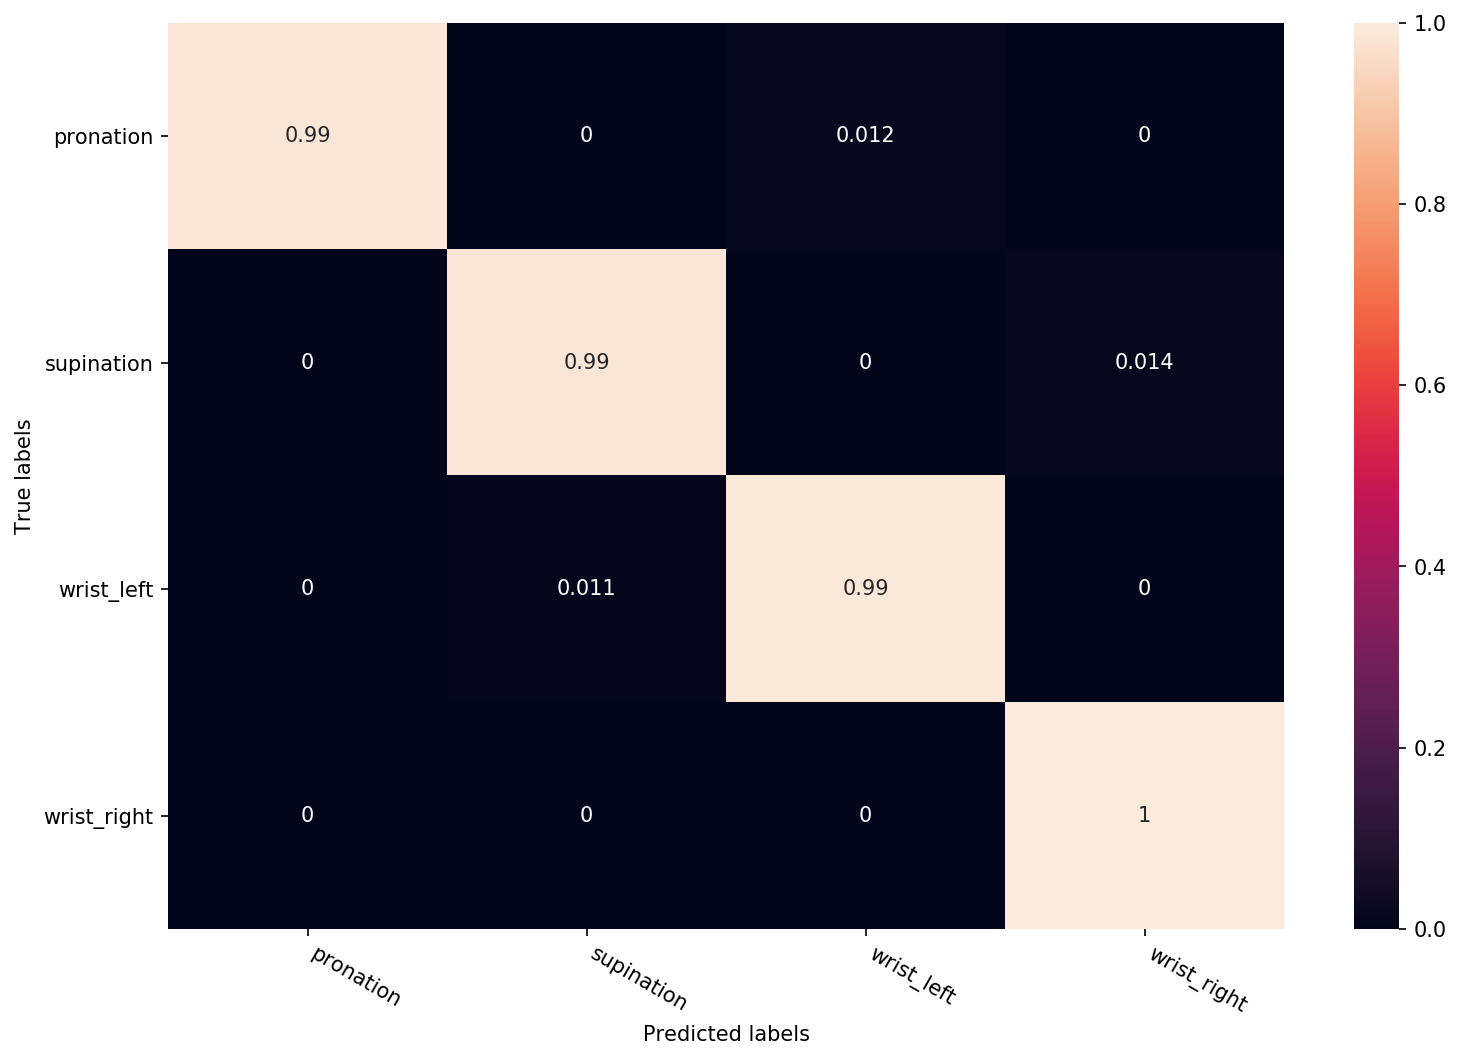

In [61]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(cm, labels, classes=None, normalize = True):
    import seaborn as sns
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax= plt.subplots(figsize=(12,8), dpi=150)
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xticks(rotation=-30, ha="left")
    plt.yticks(rotation='horizontal')

    print("Confusion matrix plotted")

name_map = test_data.class_names
labels = [name_map[k] for k in test_data.class_names.keys()]
labels.sort(key=lambda item: (item.startswith('human_'), item))
y_true_name = [name_map[k] for k in y_true]
y_pred_name = [name_map[k] for k in y_pred]
cf = confusion_matrix(y_true_name, y_pred_name, labels).astype(float)

cls_cnt = cf.sum(axis=1)
cls_hit = np.diag(cf)
cls_acc = cls_hit / cls_cnt
    
for i in range(len(test_data.class_names)):
    print(i, test_data.class_names[i], ': {:.02f}%'.format(cls_acc[i]*100))
plot_cm(cf, labels)

In [48]:
print('Done')

Done
